In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [53]:
bitcoin = pd.read_csv('./BTC_USD.csv', index_col='Date', parse_dates=['Date'], converters={'Price': float, 'Open': float, 'Low': float})
bitcoin.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-10-21,6623.7,6582.9,6636.8,6582.9,3.52K,0.56%
2018-10-20,6586.7,6517.0,6609.7,6511.3,4.61K,0.91%
2018-10-19,6527.3,6609.6,6630.2,6519.9,11.20K,-1.30%
2018-10-18,6613.0,6736.4,6778.2,6567.5,12.53K,-1.84%
2018-10-17,6737.1,6754.2,6792.7,6681.3,8.88K,-0.25%


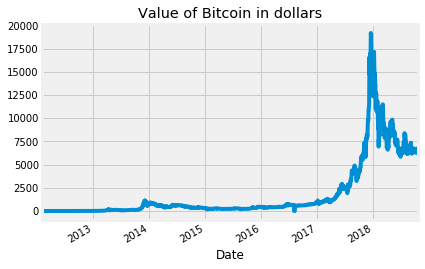

In [49]:
bitcoin['Price'].plot()
plt.title('Value of Bitcoin in dollars')
plt.show()

In [59]:
bitcoin.Price.asfreq('M').head() # TODO why this does not work??

Series([], Freq: M, Name: Price, dtype: float64)

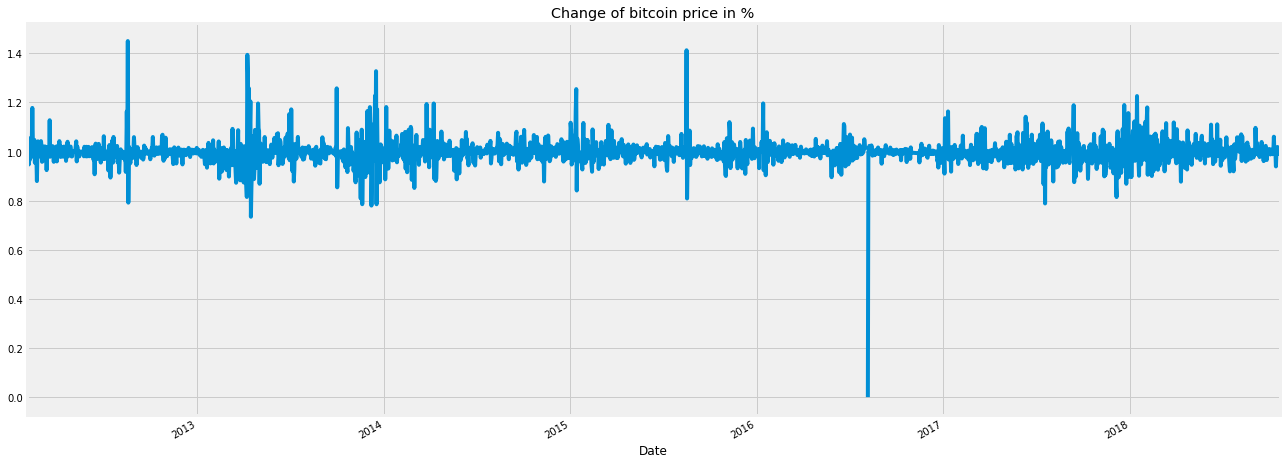

In [62]:
bitcoin['Change2'] = bitcoin.Price.div(bitcoin.Price.shift())
bitcoin['Change2'].plot(figsize=(20, 8))
plt.title('Change of bitcoin price in %')
plt.show()

In [65]:
xrp = pd.read_csv('./XRP.csv', index_col='Date', parse_dates=['Date'], converters={'Price': float, 'Open': float, 'Low': float})
xrp.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2015-01-26,0.01469,0.01700,0.01750,0.01469,-,-13.59%
2015-01-25,0.01700,0.01739,0.01739,0.01560,-,-2.24%
2015-01-24,0.01739,0.01600,0.01739,0.01500,-,8.69%
2015-01-23,0.01600,0.01602,0.01700,0.01600,-,-0.12%
2015-01-22,0.01602,0.01523,0.01750,0.01523,-,5.19%


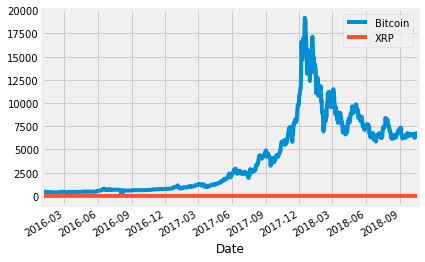

In [68]:
bitcoin[:'2016'].Price.plot()
xrp[:'2016'].Price.plot()
plt.legend(['Bitcoin', 'XRP'])
plt.show()
# TODO multiply by volume?

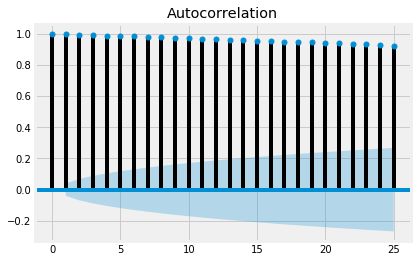

In [71]:
# Autocorrelation
# lag is timespan after which the series repeats - The correlation at lag zero is always 1
plot_acf(bitcoin.Price, lags=25, title="Autocorrelation")
plt.show()

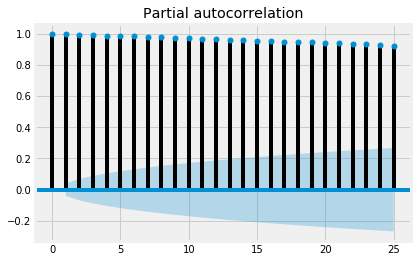

In [77]:
# Partial autocorrelation
plot_acf(bitcoin.Price, lags=25, title="Partial autocorrelation")
plt.show()